In [1]:
#import necessary library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [68]:
df = pd.read_csv('data_A.csv')
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,7317,15637411,Tochukwu,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,1,11125,15745307,Martin,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,2,45720,15677382,Aitken,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,3,74042,15694450,Tuan,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,4,109985,15734987,Aitken,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0


In [69]:
#Drop a few uneccessary columns

#These columns i drop, are too cardinal and are all unique value, which is useless in modelling.
df.drop(['Unnamed: 0','CustomerId','id','Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0


# EDA

In [70]:
#check size
df.shape

(41258, 11)

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,41238.0,657.212619,80.324627,350.00,598.0000,661.00,711.0000,850.00
Age,41258.0,38.113117,8.825835,18.00,32.0000,37.00,42.0000,92.00
Tenure,41258.0,5.020408,2.798614,0.00,3.0000,5.00,7.0000,10.00
Balance,41258.0,55845.162728,62912.415027,0.00,0.0000,0.00,120139.7625,238387.56
NumOfProducts,41258.0,1.554801,0.545583,1.00,1.0000,2.00,2.0000,4.00
HasCrCard,41258.0,0.753817,0.430791,0.00,1.0000,1.00,1.0000,1.00
IsActiveMember,41258.0,0.501018,0.500005,0.00,0.0000,1.00,1.0000,1.00
EstimatedSalary,41258.0,112741.993562,50293.991764,11.58,74838.2075,118711.75,155642.6450,199992.48
churn,41258.0,0.208760,0.406427,0.00,0.0000,0.00,0.0000,1.00


In [72]:
#print unique value for 'Geography'
df['Geography'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [73]:
#print unique value for 'Gender'
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### Since both object variable are low in cardinality, i will use OHE encoder

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41238 non-null  float64
 1   Geography        41258 non-null  object 
 2   Gender           41258 non-null  object 
 3   Age              41258 non-null  float64
 4   Tenure           41258 non-null  int64  
 5   Balance          41258 non-null  float64
 6   NumOfProducts    41258 non-null  int64  
 7   HasCrCard        41258 non-null  int64  
 8   IsActiveMember   41258 non-null  int64  
 9   EstimatedSalary  41258 non-null  float64
 10  churn            41258 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


In [75]:
df.isna().sum()

CreditScore        20
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

In [76]:
df.dropna(axis = 1, inplace = True)

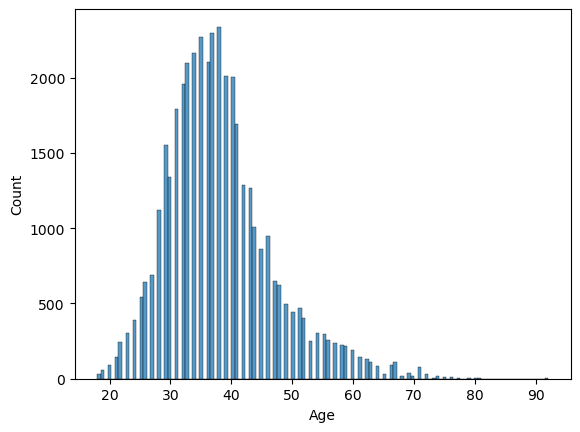

In [77]:
sns.histplot(x = df['Age'])
plt.show()

In [78]:
#do a simple correlation analysis to check how each variable correlates to the target variable.
correlation_with_target = df.drop(['Geography','Gender'], axis = 1).corr()['churn'].sort_values(ascending=False)

print(correlation_with_target)

churn              1.000000
Age                0.342282
Balance            0.125878
EstimatedSalary    0.018894
Tenure            -0.022690
HasCrCard         -0.023345
IsActiveMember    -0.207688
NumOfProducts     -0.212335
Name: churn, dtype: float64


# Feature Engineering

In [79]:
# One-hot encode 'Geography'
df = pd.get_dummies(df, columns=['Geography','Gender'])

# Display the DataFrame
df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,30.0,1,0.00,2,0,0,126551.65,1,True,False,False,False,True
1,32.0,7,121887.91,1,1,1,176570.46,0,False,True,False,False,True
2,33.0,5,0.00,2,1,0,162703.80,0,False,False,True,True,False
3,28.0,4,0.00,2,1,1,76615.31,0,True,False,False,True,False
4,67.0,3,0.00,2,1,1,114514.92,0,True,False,False,True,False


In [80]:
df.columns

Index(['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [81]:
df[['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']] = df[['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']].astype(int)

In [82]:
df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,30.0,1,0.00,2,0,0,126551.65,1,1,0,0,0,1
1,32.0,7,121887.91,1,1,1,176570.46,0,0,1,0,0,1
2,33.0,5,0.00,2,1,0,162703.80,0,0,0,1,1,0
3,28.0,4,0.00,2,1,1,76615.31,0,1,0,0,1,0
4,67.0,3,0.00,2,1,1,114514.92,0,1,0,0,1,0


In [83]:
from sklearn.model_selection import train_test_split

In [95]:
x = df.drop('churn', axis = 1)
y = df['churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42,stratify=y)

In [85]:
print(f"length of train set : {len(x_train)}")
print(f"length of test set : {len(x_test)}")

length of train set : 28880
length of test set : 12378


In [86]:
#scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [96]:
x_train_scaled = scaler.fit_transform(x_train,y_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)

In [88]:
x_train_scaled.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.242926,0.351456,-0.888770,0.818032,0.576124,0.988022,0.566877,0.866384,-0.514730,-0.530035,-0.869450,0.869450
1,-0.695400,0.708740,-0.888770,0.818032,0.576124,-1.012123,1.294281,0.866384,-0.514730,-0.530035,-0.869450,0.869450
2,0.548902,-0.720393,0.756908,-1.018327,0.576124,-1.012123,1.439798,-1.154223,1.942767,-0.530035,-0.869450,0.869450
3,2.358796,1.066023,1.226227,-1.018327,-1.735737,-1.012123,-0.827333,0.866384,-0.514730,-0.530035,1.150152,-1.150152
4,-1.487229,-0.005827,-0.888770,0.818032,0.576124,0.988022,-0.347816,0.866384,-0.514730,-0.530035,1.150152,-1.150152


In [89]:
#Random Forest dan Xgboost 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [90]:
#deklarasi model
rf_model = RandomForestClassifier(random_state = 42)
xgb_model = XGBClassifier(random_state = 42)

In [91]:
#metriks evaluasi
from sklearn.metrics import classification_report

In [98]:
#uji model random forest
rf_model.fit(x_train_scaled,y_train)
pred = rf_model.predict(x_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      9794
           1       0.71      0.54      0.61      2584

    accuracy                           0.86     12378
   macro avg       0.80      0.74      0.76     12378
weighted avg       0.85      0.86      0.85     12378



In [99]:
#uji model XGBoost
xgb_model.fit(x_train_scaled,y_train)
pred =xgb_model.predict(x_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      9794
           1       0.73      0.54      0.62      2584

    accuracy                           0.86     12378
   macro avg       0.81      0.75      0.77     12378
weighted avg       0.85      0.86      0.86     12378



#### As can be seen, XGBoost classifier outperform the RandomForest classifier by a small margin, however it proves that XGBoost classifier is the superior model, therefore we will be using XGBoost model.

In [100]:
#save to pickle format
import pickle

In [101]:
#set filename
filename = 'XGBClassifier.pkl'
pickle.dump(xgb_model, open(filename,'wb'))

In [108]:
export_path = r"C:\Users\cornelius"

loaded_XGB = pickle.load(open(filename, 'rb'))
result = loaded_XGB.score(x_test_scaled, y_test)
print(result)

print(f"XGBoost model trained and exported to: {export_path}")

0.8629019227661981
XGBoost model trained and exported to: C:\Users\cornelius
